# 우수게임리뷰 EDA

## 목적
- 세 가지 게임을 한꺼번에 비교하여 공통 지표에서 차이/패턴 찾기

## 절차
1. 데이터 준비
  - 세 게임의 데이터프레임을 하나로 합치고 '게임명' 컬럼 추가
  - 기본 전처리(아마 되어있을듯)

2. 기본 현황 비교
  - 게임별 리뷰 수 / 긍정률 / 평균·중앙값 플레이 시간 테이블 비교
  - 작성일 분포 (라인 차트, 게임별 색상 분리)
  - 상위·하위 25% 플레이 시간 (박스플롯)

3. 추천 여부 중심 분석
  - 긍정 vs 부정 리뷰어의 플레이 시간 비교 (게임별 박스플롯)
  - 긍정률 시간 추세 (라인 차트, 게임별 비교)

4. 유저 특성
  - 장시간 vs 단시간 유저 긍정률 비교 (구간별 막대 차트)
  - 신규 vs 고인물 긍정률 비교 (출시 초반 vs 최근 그룹 라인/막대 차트)

5. 요약 인사이트

In [7]:
import pandas as pd

## 1. 데이터 준비

In [8]:
df_marvel = pd.read_csv("33-1. Marvel Rivals_reviews_정제.csv", encoding='utf-8-sig')
df_rdr2 = pd.read_csv("34-1. RDR2_reviews_정제.csv", encoding='utf-8-sig')
df_pubg  = pd.read_csv("35-1. PUBG_reviews_정제.csv", encoding='utf-8-sig')

In [9]:
# 각 게임별 데이터프레임에 '게임명' 컬럼 추가
df_marvel["게임명"] = "Marvel Rivals"
df_rdr2["게임명"] = "Red Dead Redemption 2"
df_pubg["게임명"] = "PUBG"

# 세 개 데이터프레임 병합
df_all = pd.concat([df_marvel, df_rdr2, df_pubg], ignore_index=True)
print(df_all["게임명"].value_counts())
df_all.head()

게임명
Marvel Rivals            25971
PUBG                     18452
Red Dead Redemption 2    10625
Name: count, dtype: int64


,닉네임,작성일,본문_번역,추천 여부,플레이 시간,게임명
0,76561198346809573,2025-07-13,The game itself is fun a lot of unique charact...,0,208.9 hrs,Marvel Rivals
1,genealogyoftheholywar,2025-06-17,Obviously based on playtime I enjoy playing th...,0,777.9 hrs,Marvel Rivals
2,volcanoes,2025-08-12,40 40 20 20 15 20 50 50,0,421.5 hrs,Marvel Rivals
3,kubix458,2025-06-25,EOMM needs to go It will kill the game you are...,0,873.4 hrs,Marvel Rivals
4,WickedHaiku,2025-07-21,I lost a comp match and they flamed me by sayi...,1,298.9 hrs,Marvel Rivals


## 2. 기본 현황 비교

### a. 리뷰 수

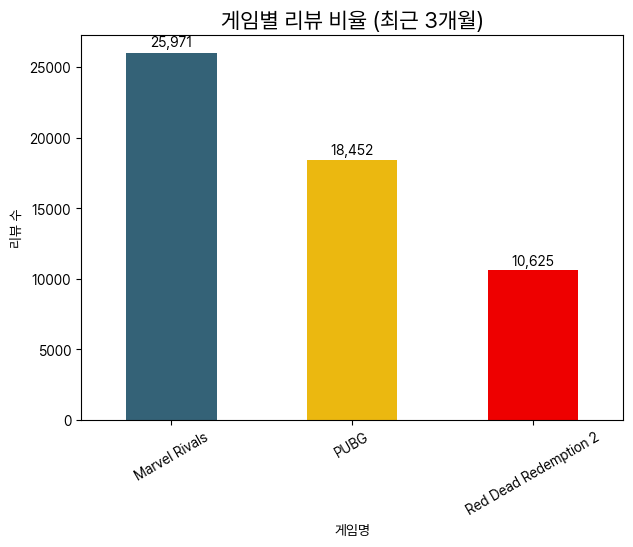

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

font_path = "C:/Users/user/Desktop/font/Pretendard-Bold.otf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False

# 게임별 색상 매핑 딕셔너리
game_colors = {
    "Marvel Rivals": "#346277",
    "PUBG": "#EBB810",
    "Red Dead Redemption 2": "#EE0000"}

# 게임별 리뷰 수 집계
review_counts = df_all["게임명"].value_counts()

plt.figure(figsize=(7,5))
bars = review_counts.plot(
    kind="bar", 
    color=[game_colors[game] for game in review_counts.index])

plt.title("게임별 리뷰 비율 (최근 3개월)", fontsize=16)
plt.ylabel("리뷰 수")
plt.xlabel("게임명")
plt.xticks(rotation=30)

# 바 위에 숫자 표시
for i, count in enumerate(review_counts):
    plt.text(i, count + (count * 0.01), f"{count:,}", ha="center", va="bottom", fontsize=10)

plt.show()

- Marvel Rivals
    - 세 게임 중 가장 많은 리뷰 수(25,971건) 확보
    - 최근 출시된 신규 타이틀답게 커뮤니티 활동이 활발
    - 단기간에 집중적인 관심을 받은 것으로 해석 가능

- PUBG
    - 18,452건으로 꾸준한 리뷰 생성
    - 장기 서비스 게임임에도 일정한 커뮤니티 규모를 유지
    - 안정적인 롱런형 타이틀 특성이 드러남

- Red Dead Redemption 2
    - 리뷰 수는 10,625건(가장 적음)
    - 청소년 이용 불가 게임이라 리뷰 수가 적을 수도 있다고 생각
    - 플레이하는데 필요한 PC 사양도 까다로운 듯 한 것이 리뷰 수에 영향을 끼쳤을 가능성이 있음
    - 커뮤니티 활동보다는 충성 유저나 신규 유입자 중심의 리뷰가 많을 가능성

### b. 작성일 분포

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# 작성일을 datetime으로 변환
df_all["작성일"] = pd.to_datetime(df_all["작성일"])

# 일 단위 리뷰 수 집계
date_counts = df_all.groupby(["게임명", df_all["작성일"].dt.date]).size().reset_index(name="리뷰수")

# 피벗 테이블 형태로 변환 (게임별 컬럼 분리)
date_pivot = date_counts.pivot(index="작성일", columns="게임명", values="리뷰수").fillna(0)

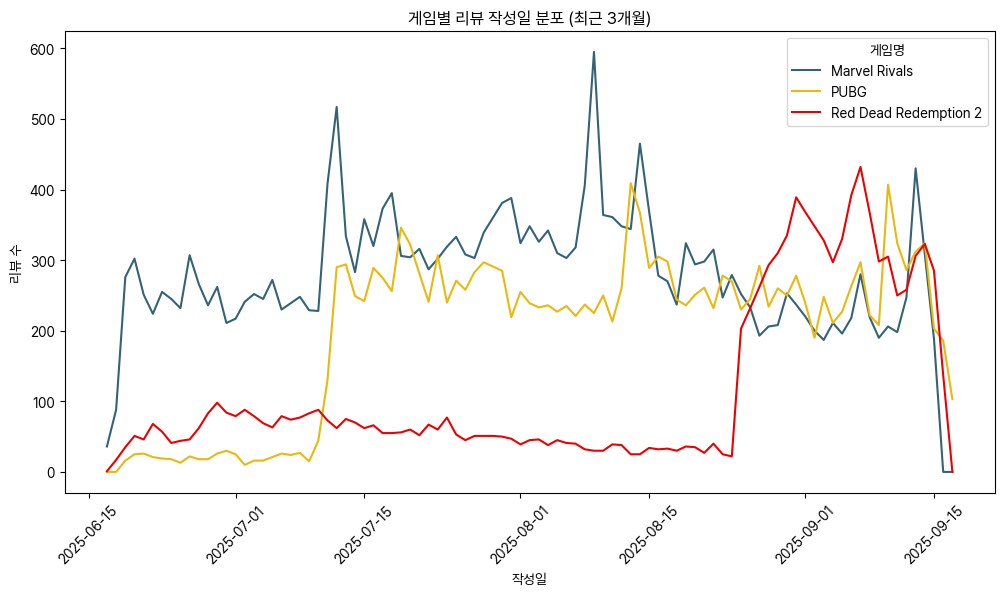

In [16]:
# 라인 차트
plt.figure(figsize=(12,6))
for game in date_pivot.columns:
    plt.plot(date_pivot.index, date_pivot[game], label=game, color=game_colors[game])

plt.title("게임별 리뷰 작성일 분포 (최근 3개월)")
plt.xlabel("작성일")
plt.ylabel("리뷰 수")
plt.legend(title="게임명")
plt.xticks(rotation=45)
plt.show()

- Marvel Rivals
    - 전체 기간 동안 가장 높은 리뷰량을 유지함
    - 6말~8초까지 지속적으로 리뷰량이 많음
    - 7초, 8초에서 리뷰가 급증함 → 대규모 패치/이벤트 발생했을 가능성

- PUBG
    - 7월 중순 이후에 급격히 증가 후 안정적인 패턴을 보임
    - 7월 중순 즈음에 에스파 콜라보와 함께 UGC 알파라는 새로운 모드가 업데이트됨
    - 이벤트 중심으로 유저 참여가 집중되어있다는 것을 알 수 있음

- Red Dead Redemption 2
    - 8말~9초에 급격히 상승
    - 6~8월은 리뷰량이 100건 이하로 낮음
    - 대규모 업데이트가 있었던 것으로 추정

### c. 게임별 추천/비추천 비율

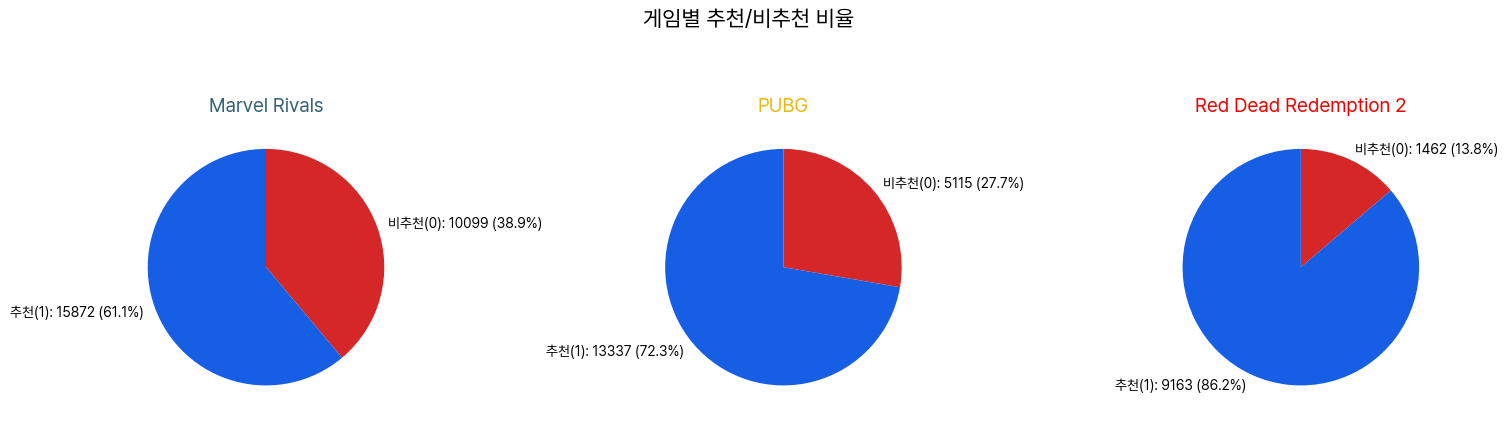

In [30]:
import matplotlib.pyplot as plt

# 폰트 세팅
from matplotlib import font_manager
font_path = "C:/Users/user/Desktop/font/Pretendard-Bold.otf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False

# 게임별 색상 매핑
game_colors = {
    "Marvel Rivals": "#346277",
    "PUBG": "#EBB810",
    "Red Dead Redemption 2": "#EE0000"
}

# 추천/비추천 비율 계산
ratio_data = (
    df_all.groupby(["게임명", "추천 여부"])
    .size()
    .reset_index(name="count")
)

game_order = ["Marvel Rivals", "PUBG", "Red Dead Redemption 2"]

fig, axes = plt.subplots(1, 3, figsize=(15,5))

for ax, game in zip(axes, game_order):
    data = ratio_data[ratio_data["게임명"] == game]
    labels = ["비추천(0)", "추천(1)"]
    counts = data.set_index("추천 여부")["count"].reindex([0,1], fill_value=0)
    colors = ["#d62728", "#165ee4"]  # 비추천=빨강, 추천=파랑

    ax.pie(
        counts,
        labels=[f"{labels[i]}: {counts.iloc[i]} ({counts.iloc[i]/counts.sum()*100:.1f}%)" for i in range(2)],
        colors=colors,
        autopct=None,
        startangle=90,
        counterclock=False
    )
    ax.set_title(game, fontsize=14, color=game_colors[game])

plt.suptitle("게임별 추천/비추천 비율", fontsize=16)
plt.tight_layout()
plt.show()

- Marvel Rivals
    - 추천(1): 61.1%
    - 비추천(0): 38.9%
>> 추천이 과반을 넘긴 하지만 비추천 비율도 4할에 가까움. 게임에 대한 호불호가 뚜렷하고 게임 런칭일로부터 기간을 보면 불만족 유저도 상당히 많은 편.

- PUBG
    - 추천(1): 72.3%
    - 비추천(0): 27.7%
>> 대체로 긍정 평가가 우세하지만 부정 평가도 약 3할 존재함. 즉, 전반적으로는 긍정적이나 완전히 호평 일색은 아님.

- Red Dead Redemption 2
    - 추천(1): 86.2%
    - 비추천(0): 13.8%
>> 압도적으로 긍정 평가가 많음. 대부분의 유저가 만족하고 추천하는 게임으로, 세 게임 중 평가가 가장 안정적이고 긍정적

### d. 추천률

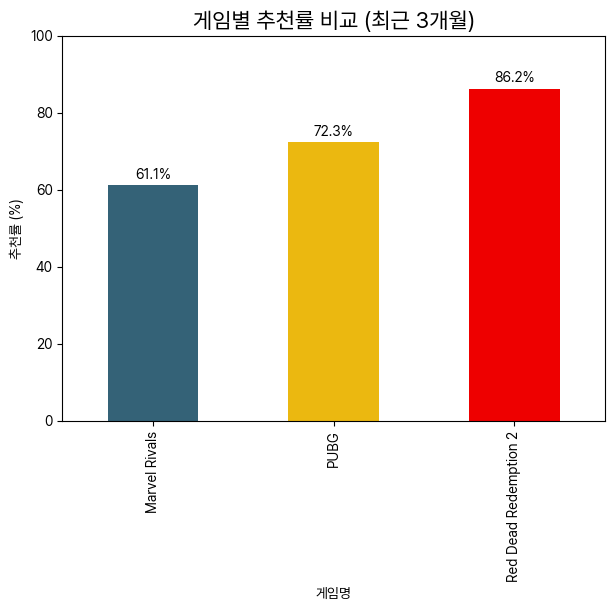

In [26]:
import matplotlib.pyplot as plt

font_path = "C:/Users/user/Desktop/font/Pretendard-Bold.otf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False

# 긍정률 계산
positive_rate = df_all.groupby("게임명")["추천 여부"].mean() * 100

# 색상 매핑 적용
colors = [game_colors[game] for game in positive_rate.index]

plt.figure(figsize=(7,5))
bars = positive_rate.plot(kind="bar", color=colors)

plt.title("게임별 추천률 비교 (최근 3개월)", fontsize=16)
plt.ylabel("추천률 (%)")
plt.xlabel("게임명")
plt.ylim(0, 100)

# 숫자 라벨 표시
for i, rate in enumerate(positive_rate):
    plt.text(i, rate + 1, f"{rate:.1f}%", ha="center", va="bottom", fontsize=10)

plt.show()

- Marvel Rivals
    - 추천 여부 61.1%로 세 게임 중 추천률이 가장 낮음
    - 리뷰 수는 가장 많았지만, 만족도는 상대적으로 떨어짐
    - 신규 게임의 특성상 초기 밸런스, 서버 문제, 최적화 이슈가 불만으로 이어졌을 가능성
>> 리뷰 수와 비교했을 때 리뷰는 많지만 만족도는 낮음

- PUBG
    - 추천 여부 72.3%로 중간 수준
    - 리뷰 수에서도 두 번째로 많음 → 리뷰 볼륨과 추천률이 균형 잡힘
    - 장기 서비스 게임으로 안정적이지만, 핵이나 매치메이킹 등 고질적 이슈로 100% 만족은 어려운 상황
>> 두 지표가 중간 위치

- Red Dead Redemption 2
    - 추천 여부 86.2로 가장 높은 추천률을 기록
    - 리뷰 수는 가장 적지만, 만족도가 압도적으로 높음
    - 스토리/그래픽/몰입감이 주 요인으로 긍정적 평가가 유지되는 반면, 멀티 플레이보다는 싱글 중심이라 리뷰 발생량은 상대적으로 적은 듯 함
>> 리뷰는 적지만 추천률이 높음

### e. 평균/중앙값 플레이 시간

In [18]:
df_all["플레이 시간"]

0          208.9 hrs
1          777.9 hrs
2          421.5 hrs
3          873.4 hrs
4          298.9 hrs
            ...     
55043      902.5 hrs
55044      448.6 hrs
55045    1,620.7 hrs
55046       48.2 hrs
55047      398.9 hrs
Name: 플레이 시간, Length: 55048, dtype: object

In [19]:
# 정규식으로 숫자(소수점 포함)만 추출
df_all["플레이 시간"] = (
    df_all["플레이 시간"]
    .astype(str)
    .str.replace(",", "")                         # 천 단위 쉼표 제거
    .str.extract(r"([0-9]*\.?[0-9]+)")            # 숫자 + 소수점 추출
    [0]                                           # extract 결과 첫 번째 컬럼
    .astype(float)
)

# 변환 확인
print(df_all["플레이 시간"].head(10))

0     208.9
1     777.9
2     421.5
3     873.4
4     298.9
5     214.7
6      64.4
7    1235.8
8    1092.1
9     469.4
Name: 플레이 시간, dtype: float64


In [20]:
# 게임별 평균/중앙값 플레이 시간 집계
playtime_summary = df_all.groupby("게임명").agg(
    평균플레이시간=("플레이 시간", "mean"),
    중앙값플레이시간=("플레이 시간", "median"))

# 보기 좋게 반올림
playtime_summary = playtime_summary.round(1)

display(playtime_summary)

,평균플레이시간,중앙값플레이시간
게임명,,
Marvel Rivals,243.6,146.1
PUBG,535.7,150.1
Red Dead Redemption 2,94.9,57.5


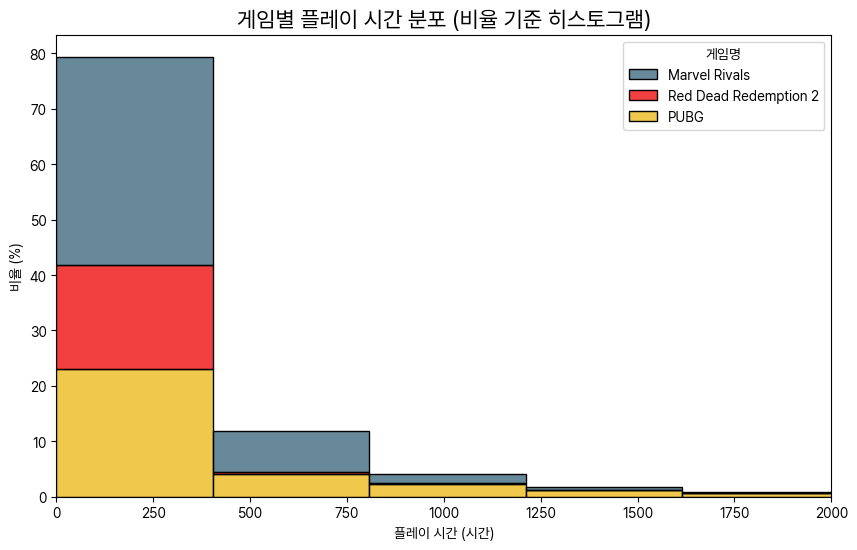

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager

# 폰트 설정
font_path = "C:/Users/user/Desktop/font/Pretendard-Bold.otf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False

# 색상 매핑
game_colors = {
    "Marvel Rivals": "#346277",
    "PUBG": "#EBB810",
    "Red Dead Redemption 2": "#EE0000"}

# 히스토그램
plt.figure(figsize=(10,6))
sns.histplot(
    data=df_all, 
    x="플레이 시간", 
    hue="게임명", 
    bins=50, 
    multiple="stack", 
    stat="percent",
    palette=game_colors)

plt.xlim(0, 2000)
plt.title("게임별 플레이 시간 분포 (비율 기준 히스토그램)", fontsize= 16)
plt.xlabel("플레이 시간 (시간)")
plt.ylabel("비율 (%)")
plt.show()

- Marvel Rivals
    - 전체 유저 중 약 80% 이상이 0~250시간 구간에 집중
    - 평균(243.6h)과 중앙값(146.1h)의 차이가 크지 않아 비교적 고른 분포를 보임
>> 신규 유저가 많고, 동시에 장시간 플레이 유저도 어느 정도 존재.
<br> 라이트 유저가 많거나, 런칭한 지 얼마 되지 않아 신규 유입이 계속 들어오는 추세일 가능성이 있음

- PUBG
    - 0~250시간 비율(라이트 유저)은 다른 게임보다 낮음
    - 대신 평균(535.7h)이 중앙값(150.1h)보다 훨씬 높아 500시간 이상 장기 플레이 유저 비중이 뚜렷함
>> 소수의 고인물 유저가 평균치를 크게 끌어올림

- Red Dead Redemption 2
    - 대부분이 100시간 미만 플레이에 집중되어 있음
    - 평균(94.9h), 중앙값(57.5h) 모두 가장 낮음 → 스토리 기반 게임 특성이 그대로 반영 → 엔딩을 본 후 장기 플레이하는 유저는 적음
>> 일부 장시간 플레이 유저도 있지만, 분포 전체에는 큰 영향 없음

## 3. 추천 여부 중심 분석

### a. 추천/비추천 리뷰어의 플레이 시간 비교

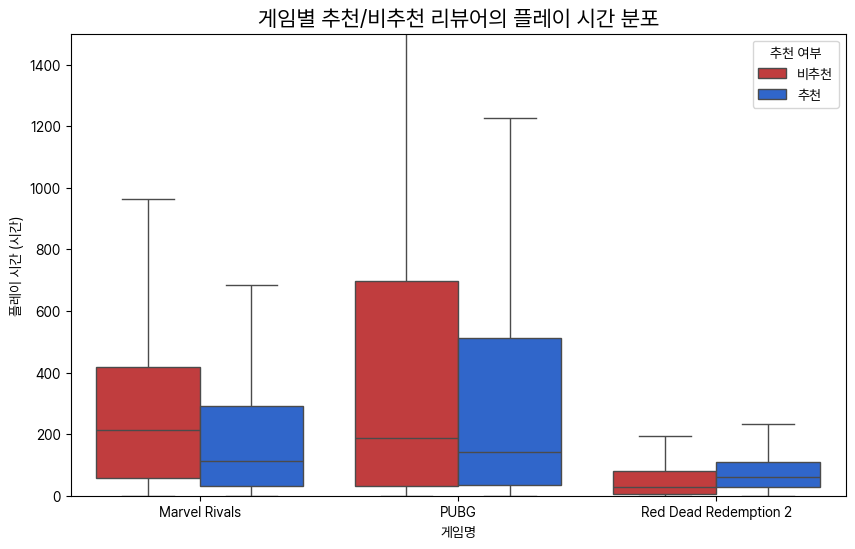

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
ax = sns.boxplot(
    data=df_all, 
    x="게임명", 
    y="플레이 시간", 
    hue="추천 여부",
    palette={1: "#165ee4", 0: "#d62728"},  # 추천=초록, 비추천=빨강
    showfliers=False,
    order=["Marvel Rivals", "PUBG", "Red Dead Redemption 2"])

plt.title("게임별 추천/비추천 리뷰어의 플레이 시간 분포", fontsize= 16)
plt.xlabel("게임명")
plt.ylabel("플레이 시간 (시간)")
plt.ylim(0, 1500)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=[handles[0], handles[1]], 
           labels=["비추천", "추천"], 
           title="추천 여부")
plt.show()

- Marvel Rivals
    - 비추천이 추천보다 플레이 시간이 더 긺
        - 장시간 유저들이 불만을 토로하며 비추천을 남겼을 것으로 추정됨
    - 중앙값 기준으로도 비추천 유저가 더 오래 플레이한 후 불만족을 표출한 것으로 보임
        - 충성 유저층을 이탈시킬만한 요인이 있는지 의문

- PUBG
    - 전체적으로 플레이 시간이 길며, 비추천 유저도 장시간 플레이를 함
    - 중앙값은 추천/비추천 차이가 크지 않지만 비추천 쪽의 분산이 큼
    - 애증의 비추천인 경우일 수 있음

- Red Dead Redemption 2
    - 전반적으로 플레이 시간이 짧음
    - 추천/비추천 사이의 큰 차이가 없음
        - 플레이 타임과 만족도는 직접적인 관계가 없고, 스토리성 게임이다보니 게임의 완성도와 결말 경험 여부에 따라 의견이 갈린 것으로 해석이 가능함

### b. 신규 vs 고인물 긍정률 비교

C:\Users\user\AppData\Local\Temp\ipykernel_18372\2474461984.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dfC = df.groupby("게임명", group_keys=False).apply(label_cohort)


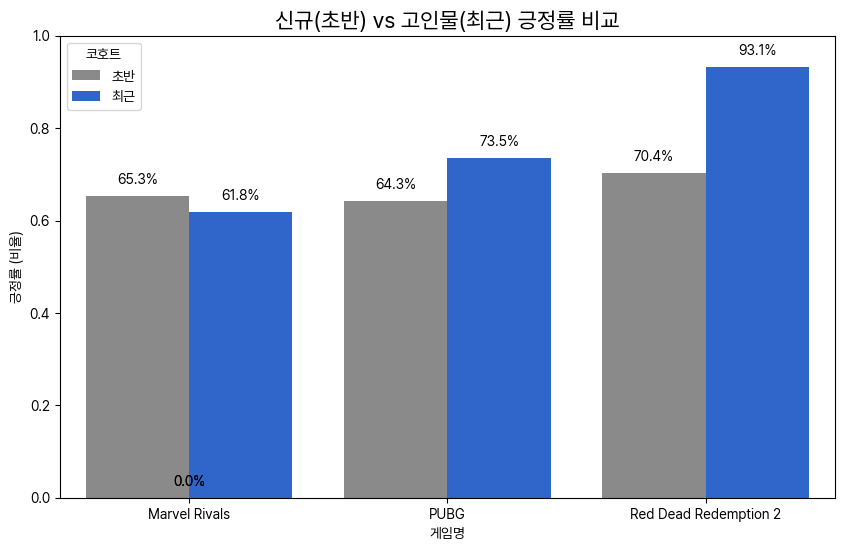

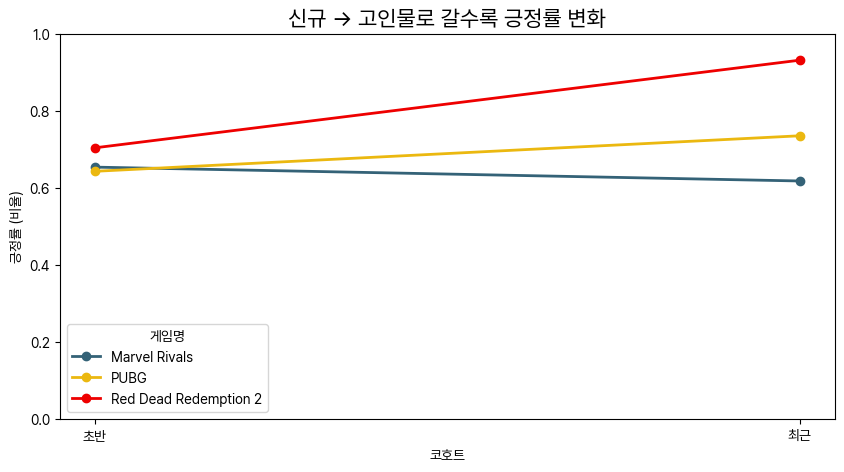

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager

font_path = "C:/Users/user/Desktop/font/Pretendard-Bold.otf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False

game_colors = {
    "Marvel Rivals": "#346277",
    "PUBG": "#EBB810",
    "Red Dead Redemption 2": "#EE0000"}


df = df_all.copy()
df["작성일"] = pd.to_datetime(df["작성일"])

# 코호트(집단) 라벨링: 각 게임별 기간의 하위 30% = '초반', 상위 30% = '최근'
def label_cohort(group: pd.DataFrame) -> pd.DataFrame:
    tmin, tmax = group["작성일"].min(), group["작성일"].max()
    # 기간 내 33%, 67% 지점 계산
    q33 = tmin + (tmax - tmin) * 0.30
    q67 = tmin + (tmax - tmin) * 0.70
    # 두 코호트만 사용 (중간구간은 제외)
    conditions = [
        group["작성일"] <= q33,
        group["작성일"] >= q67
    ]
    choices = ["초반", "최근"]
    group["코호트"] = pd.Series(pd.NA, index=group.index)
    group.loc[conditions[0], "코호트"] = choices[0]
    group.loc[conditions[1], "코호트"] = choices[1]
    return group

dfC = df.groupby("게임명", group_keys=False).apply(label_cohort)
dfC = dfC.dropna(subset=["코호트"])

# 코호트별 긍정률(추천 여부=1 비율) 계산
pos_rate = (
    dfC.groupby(["게임명", "코호트"])["추천 여부"]
    .mean()
    .reset_index()
    .rename(columns={"추천 여부": "긍정률"})
)
# 비율 → % 보기 좋게 (그래프는 0~1 그대로 그릴 수 있음)
pos_rate["긍정률(%)"] = (pos_rate["긍정률"] * 100).round(1)

# ==== 막대 차트: 게임 x, hue=코호트 ====
plt.figure(figsize=(10,6))
sns.barplot(
    data=pos_rate,
    x="게임명", y="긍정률",
    hue="코호트",
    palette={"초반": "#8a8a8a", "최근": "#165ee4"}  # 초반=회색, 최근=파랑
)
plt.title("신규(초반) vs 고인물(최근) 긍정률 비교", fontsize=16)
plt.xlabel("게임명"); plt.ylabel("긍정률 (비율)")
plt.ylim(0, 1); plt.legend(title="코호트")

# 막대 위에 % 숫자 표시
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(
        p.get_x() + p.get_width()/2, height + 0.02,
        f"{height*100:.1f}%", ha="center", va="bottom", fontsize=10
    )
plt.show()

# 라인 차트: 코호트(초반→최근) 변화 폭을 게임별로 보기
# 피벗으로 정렬 보장
pivot_line = pos_rate.pivot(index="코호트", columns="게임명", values="긍정률").loc[["초반","최근"]]
plt.figure(figsize=(10,5))
for game in pivot_line.columns:
    plt.plot(["초반","최근"], pivot_line[game].values, marker="o", linewidth=2, color=game_colors[game], label=game)
plt.title("신규 → 고인물로 갈수록 긍정률 변화", fontsize=16)
plt.ylabel("긍정률 (비율)"); plt.xlabel("코호트")
plt.ylim(0, 1); plt.legend(title="게임명")
plt.show()

- Marvel Rivals
    - 막대그래프 : 초반 65.3% → 최근 61.8%로 약 3.5% 하락
    - 라인그래프 : 완만한 하락 추세
>> 너무 기대감이 컸던 탓일까? 런칭된 지 1년도 채 되지 않은 게임치고는 빠르게 하락하는 추세를 보임

- PUBG
    - 막대그래프: 초반 64.3% → 최근 73.5%로 약 9.2% 상승
    - 라인그래프: 완만한 상승 추세
>> 안정적이고 롱런하는 게임의 그래프를 보여줌

- Red Dead Redemption 2
    - 막대그래프: 초반 70.4% → 최근 93.1%로 약 22.7% 상승
    - 라인그래프: 가장 가파른 상승 추세
>> 신규 유저도 어느 정도 긍정적이었지만 장기 플레이 유저일수록 압도적으로 긍정적인 반응을 보임

## 4. 요약

1. 리뷰 볼륨 & 활동성
    - Marvel Rivals: 리뷰 수 최다(25,971건) → 신규 타이틀답게 커뮤니티 활동이 활발하지만 만족도는 낮음.
    - PUBG: 18,452건 → 장기 서비스임에도 안정적 활동 유지. 이벤트(콜라보/모드) 때 리뷰가 집중적으로 증가.
    - RDR2: 10,625건으로 가장 적음 → 청불/PC사양/스토리형 특성으로 커뮤니티 리뷰 활동은 제한적.

2. 추천/비추천 비율 & 만족도
    - Marvel Rivals: 추천 61%로 세 게임 중 가장 낮음. 리뷰는 많지만 만족도는 낮아 불만층이 뚜렷.
    - PUBG: 추천 72%로 중간 수준. 긍정적이지만 여전히 핵/매치메이킹 같은 고질적 문제로 완전한 호평은 어려움.
    - RDR2: 추천 86%로 압도적 긍정. 적은 리뷰 수에도 불구하고 만족도는 가장 높음.

3. 플레이 시간 특성
    - Marvel Rivals: 평균 243h, 중앙값 146h → 라이트 유저 비중이 크지만 일정 규모의 장기 플레이 유저도 존재.
    - PUBG: 평균 535h vs 중앙값 150h → 고인물 유저가 평균을 크게 끌어올림. 소수의 헤비 유저 영향이 큼.
    - RDR2: 평균 95h, 중앙값 58h → 대부분 100h 미만에 몰림. 스토리 클리어형 패턴이 뚜렷.

4. 추천 여부와 플레이 시간 관계
    - Marvel Rivals: 비추천 유저가 오히려 더 오래 플레이 → 충성 유저가 불만을 토로하는 리스크 징후.
    - PUBG: 추천·비추천 모두 장시간 플레이. 비추천도 ‘애증’의 성격.
    - RDR2: 추천/비추천 간 큰 차이 없음. 플레이 시간보다 게임 완성도/스토리 체험 여부가 만족도의 핵심 요인.

5. 신규 vs 고인물 긍정률 변화
    - Marvel Rivals: 초반 65% → 최근 62%로 하락. 기대 대비 실망감이 반영된 추세.
    - PUBG: 초반 64% → 최근 74%로 상승. 안정적 운영과 장기적 충성 유저 확보가 긍정에 기여.
    - RDR2: 초반 70% → 최근 93%로 급상승. 시간이 지날수록 높은 완성도에 대한 재평가가 이루어짐.